<a href="https://colab.research.google.com/github/nurulnadira/Airbnb-Price-Prediction/blob/main/Airbnb_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import sys
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
#pd.set_option('display.expand_frame_repr', False)
pd.option_context('display.max_rows', None, 'display.max_columns', None)
pd.set_option('display.max_rows', None)
#set seaborn style
sns.set(font_scale = 1, palette="rocket",style="whitegrid",rc={"figure.figsize":(15, 8)})

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **Import Dataset**

In [4]:
# Importing the dataset 1 (listings-4)
listings_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/listings-4.csv')

In [5]:
listings_data.head()

id                         listing_url       scrape_id last_scraped  \
0  36299  https://www.airbnb.com/rooms/36299  20220309064259   2022-03-09   
1  36660  https://www.airbnb.com/rooms/36660  20220309064259   2022-03-09   
2  24328  https://www.airbnb.com/rooms/24328  20220309064259   2022-03-09   
3  25123  https://www.airbnb.com/rooms/25123  20220309064259   2022-03-09   
4  15400  https://www.airbnb.com/rooms/15400  20220309064259   2022-03-09   

                                                 name  \
0                 Kew Gardens 3BR house in cul-de-sac   
1                     You are GUARANTEED to love this   
2  Battersea bedroom & studio, parking, shared garden   
3                   Clean big Room in London (Room 1)   
4                 Bright Chelsea  Apartment. Chelsea!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                description  \
0  3 Bed House with garden close to Thames river (2 min walk, private road to river nearby), on the District Line Underground (7 min walk) for direct access into Central London, near Kew Gardens. Kids playground in walking distance along the Thames tow path.<br /><br /><b>The space</b><br />Residential neighborhood, mix of English and corporate expat families. House is in a cul-de-sac with a private road to the river Thames at its end. River about 300 feet away. Walking distance to subway (7 min). <br /><br />Central London via the underground: 30-40 min, the District line (Kew Gardens stop 7 min walk - Zone 3). In addition, the Overground to Stratford also stops at the Kew Gardens underground station (Kew Gardens stop 7 min walk). Further, there is an overland railway station at Kew Bridge (10 min walk) to take you to Waterloo railway station in 21 minutes. <br />By bicycle one can follow the towpath to Hammersmith Bridge or continue to Putney Bridge (50 min). <br />Lastly, several Stree   
1  <b>The space</b><br />This room is located on the ground floor of the house. It is lovely, a very good size with a double bed and has a beautiful view of the garden, with your own door leading out to the patio. AND a plentiful breakfast is included in the price of the room!<br /><br />Blenheim Lodge is a beautiful house in a quiet upmarket residential area in North London, the perfect place to rest and recover after a busy day out sightseeing. You can take advantage of the big garden in the summer months, when it is full of colourful flowers and wildlife. <br /><br />Our house is in Zone 3, 20 minutes by underground to London Bridge and Kings Cross and just 10 minutes to Camden Market. The nearest station is East Finchely and is 5 minutes walking distance from our house. <br /> <br /><br />Cinema, shops, pubs and restaurants are minutes away from the house. <br /><br />If you do not mind changing rooms in order to cover your requested days please contact me as I might be able to book y   
2  Artist house, bright high ceiling rooms, private parking and a communal garden in a conservation area near Battersea Park. Bedroom with double bed (160x200) and a separate dres

### **Summary of Dataset** 

In [6]:
#Dataset Information
print("Dataset Shape:",listings_data.shape)
print("\nDataset Type:", listings_data.dtypes)
print("\nDataset Describe \n:",listings_data.describe())
list(listings_data.columns)

Dataset Shape: (66632, 74)

Dataset Type: id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_i

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

# **Crime Rate by Neighbourhood Dataset**

Data collected from https://data.london.gov.uk/dataset/recorded_crime_summary

MPS Borough Level Crime (most recent 24 months) - July 2020 - June 2022

In [7]:
# Importing the dataset 1 (listings-4)
crime_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Borough Level Crime Rate.csv')

In [8]:
crime_data.loc[:,'Row_Total'] = crime_data.sum(numeric_only=True, axis=1)
crime_data.drop(crime_data.columns.difference(['LookUp_BoroughName','Row_Total']), 1, inplace=True) #remove unnecessary columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [9]:
clean_crime_data=crime_data.groupby(['LookUp_BoroughName']).sum()

In [10]:
clean_crime_data.head()

Row_Total
LookUp_BoroughName             
Barking and Dagenham      40145
Barnet                    55132
Bexley                    30923
Brent                     58302
Bromley                   45297

# **Property Index Price London Dataset**

Obtained from UK House Price Index.

The data was filtered from index price list for London Boroughs in March 2022 to match with the corresponding date from the listing dataset
https://data.london.gov.uk/dataset/uk-house-price-index


In [97]:
# Importing the dataset 1 (listings-4)
property_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Property Index Price London Mar 22.csv')

In [98]:
property_data.dtypes

Neigbourhood            object
Property Index Price    object
dtype: object

In [99]:
property_data['Property Index Price']=property_data['Property Index Price'].str.replace(r',','')
property_data['Property Index Price']=property_data['Property Index Price'].astype(str).astype(int)
property_data.dtypes

Neigbourhood            object
Property Index Price     int64
dtype: object

In [86]:
property_data.head()

Neigbourhood Property Index Price
0      City of London               789805
1  Barking & Dagenham               344899
2              Barnet               599326
3              Bexley               396992
4               Brent               538732

# **Data Cleaning and Pre-Processing**

In [100]:
#REMOVE COLUMNS
def remove_columns(dataset, to_remove):
    ### BEGIN SOLUTION    
    data = dataset.drop(to_remove, axis=1)
    ### END SOLUTION
    return data

In [101]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val
    
def split_list_into_columns(df, column_name, max_dummies_num = 10):
    ''' Split values in columns, which contain lists (for example, amenities) '''
    
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
      
    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)
        
    return

In [102]:
#Remove duplicates

#1. Remove duplicates - Ensure there's no duplicate in the data
listings_data.drop_duplicates()

#2. Remove unnecessary columns
to_remove=['scrape_id','last_scraped','neighbourhood','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','host_name','host_url','host_listings_count','host_total_listings_count','host_thumbnail_url','host_picture_url','has_availability','availability_30','availability_60','availability_90','availability_365','calendar_last_scraped']
listings_data_clean_1=remove_columns(listings_data,to_remove)

#3. Remove columns with no values
to_remove=['neighbourhood_group_cleansed','license','bathrooms','calendar_updated']
listings_data_clean_1=remove_columns(listings_data_clean_1,to_remove)

#4. Convert price column to numeric
listings_data_clean_2=listings_data_clean_1.copy()
listings_data_clean_2["price_clean"] = listings_data_clean_1["price"].replace({'\$':'',',': ''}, regex = True)
listings_data_clean_2["price_clean"] = listings_data_clean_2["price_clean"].astype(float, errors = 'raise')

#5. Format date columns
#listings_data_clean_2['host_since'] = listings_data_clean_2['host_since'].astype('datetime64')
#listings_data_clean_2['first_review'] = listings_data_clean_2['first_review'].astype('datetime64')
#listings_data_clean_2['last_review'] = listings_data_clean_2['last_review'].astype('datetime64')
to_remove=['host_since','first_review','last_review']
listings_data_clean_2=remove_columns(listings_data_clean_2,to_remove)

#6. Split list to columns
split_list_into_columns(listings_data_clean_2, 'amenities')
split_list_into_columns(listings_data_clean_2, 'host_verifications')
to_remove=['price','amenities','host_verifications']
listings_data_clean_2=remove_columns(listings_data_clean_2,to_remove)

In [103]:
print("Dataset Shape:",listings_data_clean_2.shape)

Dataset Shape: (66632, 64)


In [104]:
listings_data_clean_2.dtypes

id                                                int64
listing_url                                      object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_neighbourhood                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood_cleansed                           object
latitude                                        

In [105]:
print(listings_data_clean_2.isna().sum())

id                                                  0
listing_url                                         0
name                                               24
description                                      2192
neighborhood_overview                           27563
picture_url                                         0
host_id                                             0
host_location                                     158
host_about                                      30034
host_response_time                              31773
host_response_rate                              31773
host_acceptance_rate                            28282
host_is_superhost                                  24
host_neighbourhood                              20462
host_has_profile_pic                               24
host_identity_verified                             24
neighbourhood_cleansed                              0
latitude                                            0
longitude                   

In [106]:
#Dealing with NAN values
#Going through the columns with NAN values, some of the columns has NAN values. (Eg. 24 missing rows on host information)
#As 24 rows are not a significant, hence it will be removed.

listings_data_clean_2=listings_data_clean_2.dropna(subset=['name','bathrooms_text','description','host_location'])

#For empty bedrooms, upon random checking it was noted that these listings are actually studio unit. Hence, the NA will be filled with 0.
#listings_data_clean_2.bedrooms.fillna(0)
listings_data_clean_3=listings_data_clean_2.copy()
listings_data_clean_3[['bedrooms']] = listings_data_clean_3[['bedrooms']].fillna(0)

#For bedrooms, there are 1519 rows with empty rows. 
#Upon checking, these could mean that it could fit 1 or 2 guests. 
#However, since the number of missing rows accounts to only 2% of the data
#will remove the rows with empty column
listings_data_clean_3=listings_data_clean_3.dropna(subset=['beds'])


#For empty description, replaced it with no information provided
listings_data_clean_3[['neighborhood_overview','host_neighbourhood','host_about']] = listings_data_clean_3[['neighborhood_overview','host_neighbourhood','host_about']].fillna('No information provided')

#Remove rows with missing values in reviews
#listings_data_clean_4=listings_data_clean_3.dropna(subset=['first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month'])
listings_data_clean_4=listings_data_clean_3.dropna(subset=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month'])

In [107]:
#convert rate into float
listings_data_clean_5=listings_data_clean_4.copy()
listings_data_clean_5['host_response_rate'] = listings_data_clean_4['host_response_rate'].str.rstrip('%').astype('float')
listings_data_clean_5['host_acceptance_rate'] = listings_data_clean_4['host_acceptance_rate'].str.rstrip('%').astype('float')

In [108]:
#Impute host response and acceptance rate with mean
listings_data_clean_5['host_response_rate']=listings_data_clean_5['host_response_rate'].fillna(listings_data_clean_5['host_response_rate'].mean())
listings_data_clean_5['host_acceptance_rate']=listings_data_clean_5['host_acceptance_rate'].fillna(listings_data_clean_5['host_acceptance_rate'].mean())

#Impute categorical variable (host response time) with mode - the most frequent
#listings_data_clean_5['host_response_time'].value_counts()
listings_data_clean_5[['host_response_time']]=listings_data_clean_5[['host_response_time']].fillna('within an hour')

In [109]:
print(listings_data_clean_5.isna().sum())

id                                              0
listing_url                                     0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_id                                         0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0


In [110]:
listings_data_clean_5.shape

(45158, 64)

In [111]:
property_data.dtypes

Neigbourhood            object
Property Index Price     int64
dtype: object

In [112]:
listings_data_clean_6=listings_data_clean_5.copy()

In [113]:
property_data.dtypes

Neigbourhood            object
Property Index Price     int64
dtype: object

In [114]:
#using index to match crime and property index price
listings_data_clean_6.set_index('neighbourhood_cleansed',inplace=True)
listings_data_clean_6["crime"]=listings_data_clean_6.index.map(clean_crime_data['Row_Total'])

property_data['Neigbourhood'] = property_data['Neigbourhood'].str.strip()
property_data['Neigbourhood']=property_data['Neigbourhood'].str.replace(r'&','and')

property_data.set_index('Neigbourhood',inplace=True)
listings_data_clean_6["Property Index Price"]=listings_data_clean_6.index.map(property_data['Property Index Price'])

listings_data_clean_6 = listings_data_clean_6.reset_index()

In [115]:
print(listings_data_clean_6.isna().sum())

neighbourhood_cleansed                            0
id                                                0
listing_url                                       0
name                                              0
description                                       0
neighborhood_overview                             0
picture_url                                       0
host_id                                           0
host_location                                     0
host_about                                        0
host_response_time                                0
host_response_rate                                0
host_acceptance_rate                              0
host_is_superhost                                 0
host_neighbourhood                                0
host_has_profile_pic                              0
host_identity_verified                            0
latitude                                          0
longitude                                         0
property_typ

In [143]:
test=listings_data_clean_6.groupby('neighbourhood_cleansed')[['price_clean', 'Property Index Price']].mean()

In [157]:
test = test.reset_index()

In [151]:
test.head()

neighbourhood_cleansed  price_clean  Property Index Price
0   Barking and Dagenham    83.489177              344899.0
1                 Barnet    95.504598              599326.0
2                 Bexley    62.791908              396992.0
3                  Brent   112.254085              538732.0
4                Bromley    82.012723              498721.0

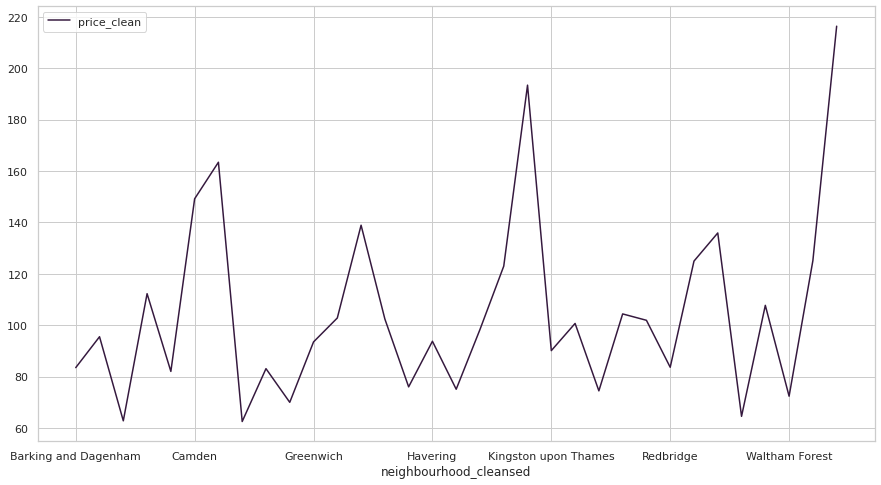

In [158]:
#test.set_index('neighbourhood_cleansed').plot(figsize=(50,30), grid=True)

test.plot(x="neighbourhood_cleansed", y=["price_clean"])



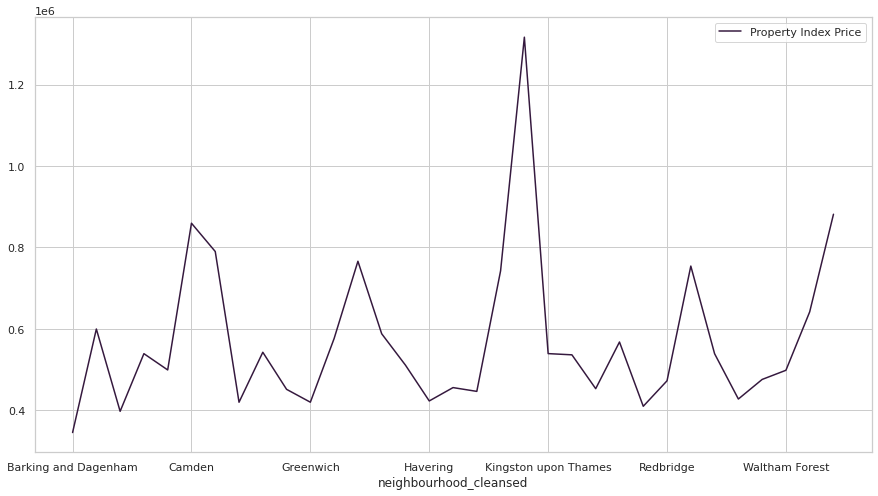

In [159]:
test.plot(x="neighbourhood_cleansed", y=["Property Index Price"])

In [168]:
test[['Property Index Price','price_clean']].corr()

Property Index Price  price_clean
Property Index Price              1.000000     0.850179
price_clean                       0.850179     1.000000

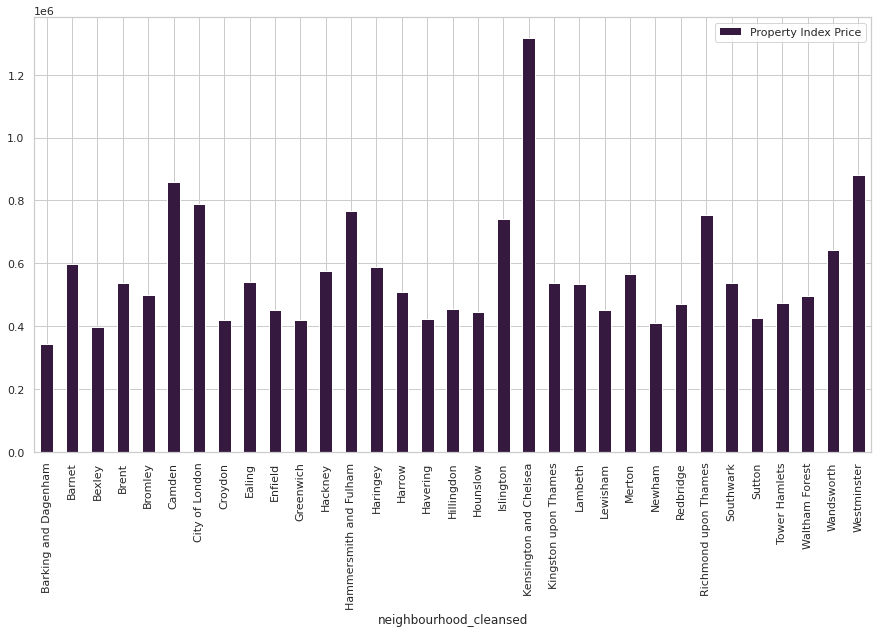

In [169]:
test.plot(x="neighbourhood_cleansed", y=["Property Index Price"], kind="bar")

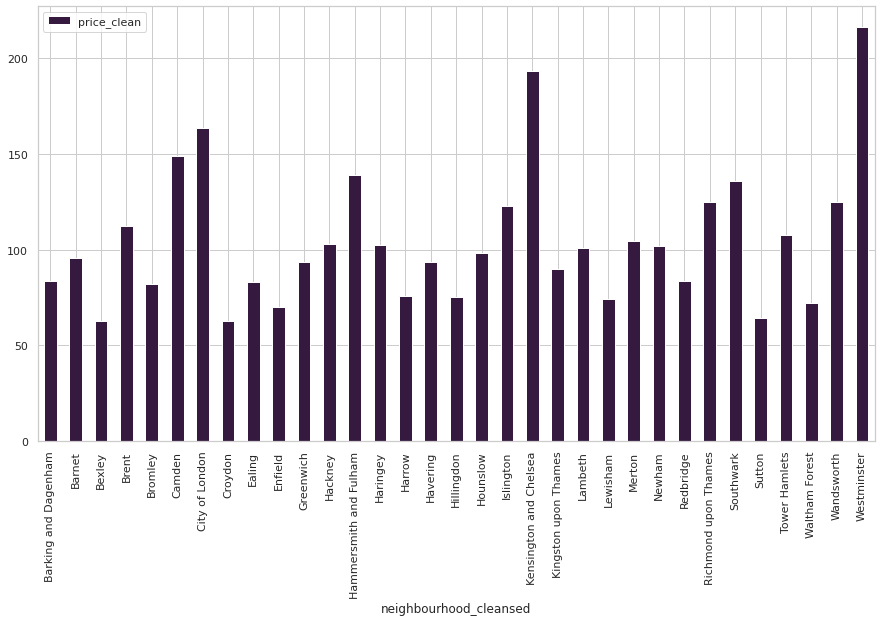

In [165]:
test.plot(x="neighbourhood_cleansed", y=["price_clean"], kind="bar")

# **Exploratory Data Analysis**

## **Descriptive Statistics**

In [ ]:
# Renaming the neighbourhood column
listings_data_clean_6.rename(columns={'neighbourhood_cleansed': 'Borough'}, inplace=True)

In [ ]:
listings_data_clean_6.describe()

id       host_id  host_response_rate  host_acceptance_rate  \
count  4.515800e+04  4.515800e+04        45158.000000          45158.000000   
mean   6.087826e+15  9.704911e+07           92.816391             78.498250   
std    5.772662e+16  1.111527e+08           13.994211             22.871872   
min    1.540000e+04  4.775000e+03            0.000000              0.000000   
25%    1.499547e+07  1.439342e+07           92.816391             78.498250   
50%    2.594973e+07  4.579636e+07           92.816391             78.498250   
75%    3.947634e+07  1.490721e+08          100.000000             96.000000   
max    5.752054e+17  4.475593e+08          100.000000            100.000000   

           latitude     longitude  accommodates      bedrooms          beds  \
count  45158.000000  45158.000000  45158.000000  45158.000000  45158.000000   
mean      51.508985     -0.128356      3.121352      1.420568      1.781390   
std        0.047546      0.096220      1.923194      0.907954      1.295859   
min       51.290570     -0.510650      1.000000      0.000000      1.000000   
25%       51.482656     -0.188410      2.000000      1.000000      1.000000   
50%       51.513490     -0.124125      2.000000      1.000000      1.000000   
75%       51.538590     -0.069863      4.000000      2.000000      2.000000   
max       51.685220      0.288570     16.000000     22.000000     60.000000   

       minimum_nights  maximum_nights  number_of_reviews  \
count    45158.000000    4.515800e+04       45158.000000   
mean         5.318127    3.463614e+04          23.164644   
std         24.126742    5.314727e+06          43.649265   
min          1.000000    1.000000e+00           1.000000   
25%          1.000000    3.500000e+01           3.000000   
50%          2.000000    1.125000e+03           8.000000   
75%          4.000000    1.125000e+03          24.000000   
max       1124.000000    1.000000e+09        1056.000000   

       number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
count           45158.000000            45158.000000          45158.000000   
mean                3.755791                0.371562              4.668328   
std                10.906763                1.364748              0.513321   
min                 0.000000                0.000000              0.000000   
25%                 0.000000                0.000000              4.550000   
50%                 0.000000                0.000000              4.830000   
75%                 4.000000                0.000000              5.000000   
max               729.000000              105.000000              5.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count            45158.000000               45158.000000   
mean                 4.736222                   4.625786   
std                  0.495382                   0.572001   
min                  0.000000                   0.000000   
25%                  4.670000                   4.500000   
50%                  4.900000                   4.810000   
75%                  5.000000                   5.000000   
max                  5.000000                   5.000000   

       review_scores_checkin  review_scores_communication  \
count           45158.000000                 45158.000000   
mean                4.796847                     4.811058   
std                 0.452392                     0.449364   
min                 0.000000                     0.000000   
25%                 4.780000                     4.800000   
50%                 4.960000                     4.990000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  \
count            45158.000000         45158.000000   
mean                 4.748968             4.636351   
std                  0.417552             0.513624   
min                  0.000000             

In [ ]:
listings_data_clean_6.dtypes

Borough                                          object
id                                                int64
listing_url                                      object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                object
host_neighbourhood                               object
host_has_profile_pic                             object
host_identity_verified                           object
latitude                                        

## **Evaluating Competition**

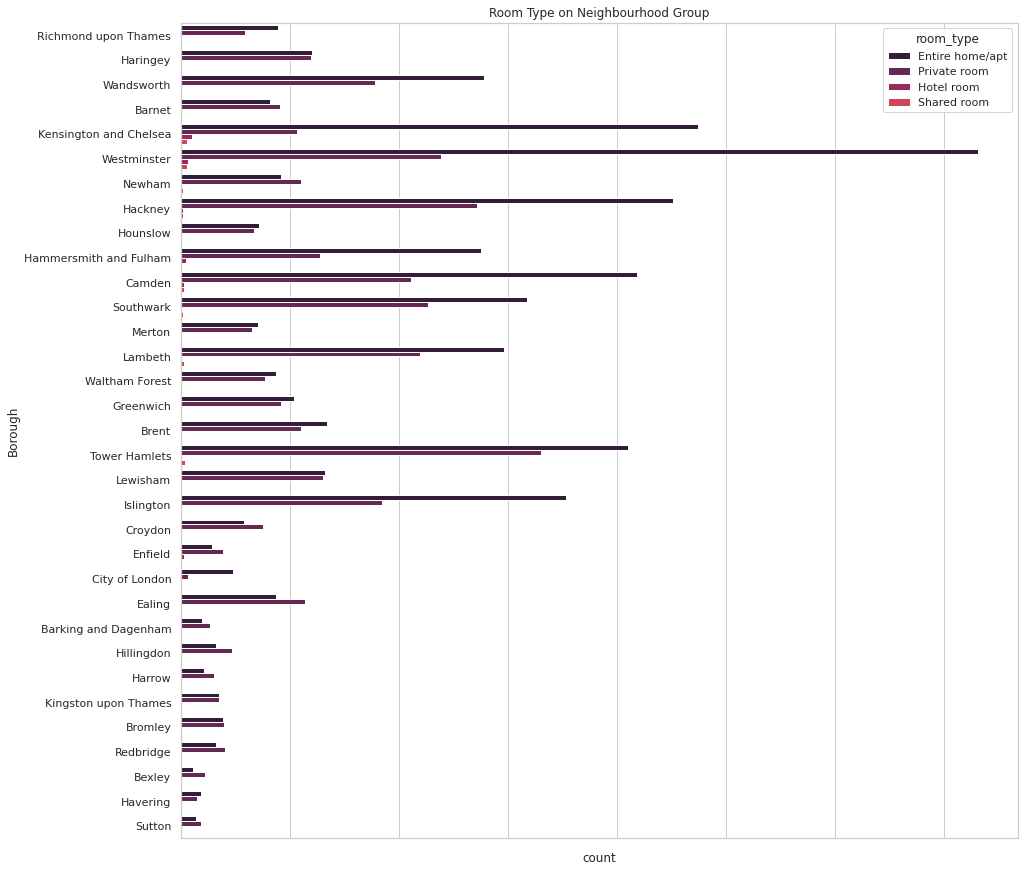

In [ ]:
sns.set(font_scale = 1, palette="rocket",style="whitegrid")
plt.figure(figsize=(15,15))
plt.title("Room Type on Neighbourhood Group")
plt.xticks(rotation='horizontal')
#ax=sns.countplot(listings_data_clean_6.neighbourhood_cleansed,hue=listings_data_clean_6.room_type)
ax=sns.countplot(y="Borough",hue="room_type",data=listings_data_clean_6)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

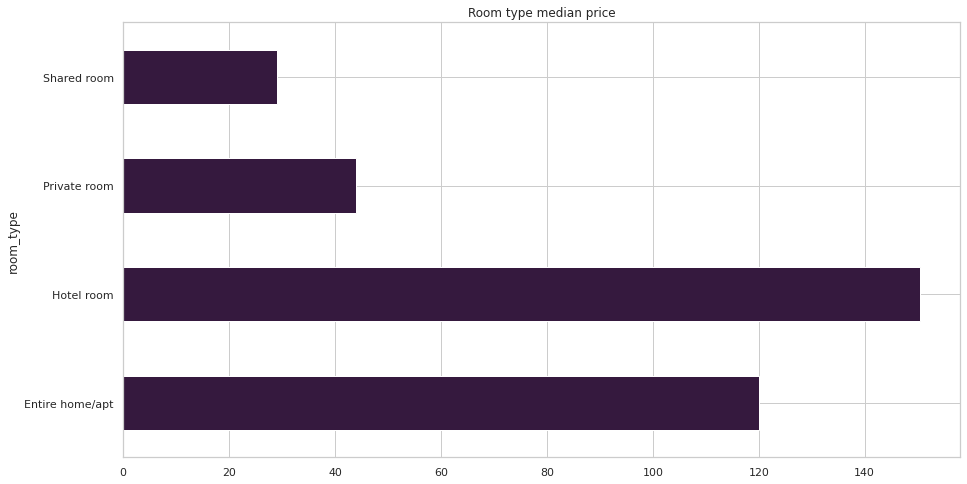

In [ ]:
type_price=listings_data_clean_6.groupby(['room_type'])['price_clean'].median().plot(kind='barh',title='Room type median price')  

## **It is all about location, or is it?**

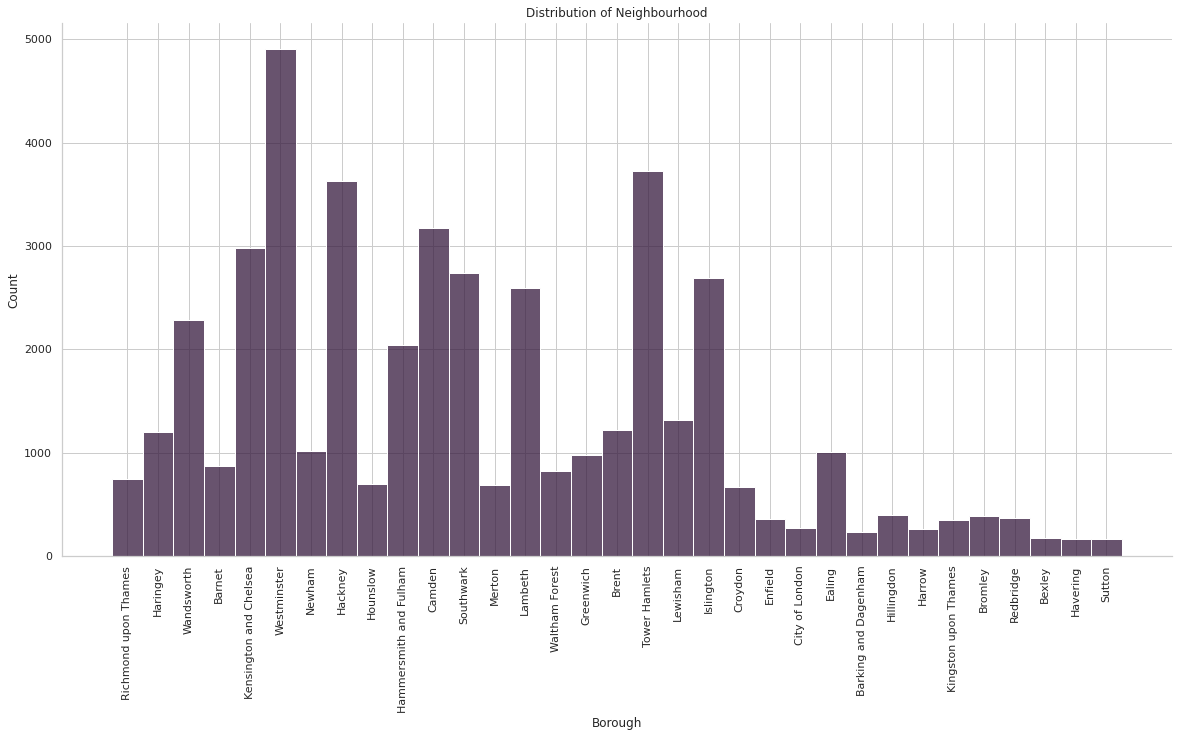

In [ ]:
#Neighbourhood Distribution
sns.set(font_scale = 1, palette="rocket",style="whitegrid",rc={"figure.figsize":(15, 8)})
ax=sns.displot(listings_data_clean_6, x="Borough",height=8.27, aspect=2/1).set(title="Distribution of Neighbourhood")
ax.set_xticklabels(rotation=90)

In [ ]:
# Importing the London borough boundary GeoJSON file as a dataframe in geopandas
!pip install geopandas
import geopandas as gpd
map_data = gpd.read_file('gdrive/My Drive/Colab Notebooks/neighbourhoods.geojson')
# Dropping the empty column
map_data.drop('neighbourhood_group', axis=1, inplace=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Creating a dataframe of listing counts and median price by borough
df_borough = pd.DataFrame(listings_data_clean_6.groupby('Borough').size())
df_borough.rename(columns={0: 'number_of_listings'}, inplace=True)
df_borough['median_price'] = listings_data_clean_6.groupby('Borough').price_clean.median().values

# Joining the dataframes
df_borough = map_data.set_index('neighbourhood').join(df_borough)

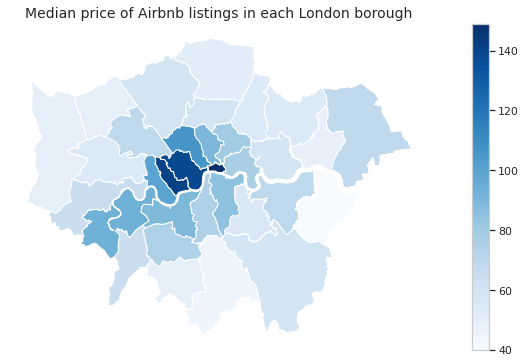

In [ ]:
# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
df_borough.plot(column='median_price', cmap='Blues', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each London borough', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(df_borough.median_price), vmax=max(df_borough.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

In [ ]:
df_borough.median_price

neighbourhood
Kingston upon Thames       65.0
Croydon                    45.0
Bromley                    60.0
Hounslow                   65.0
Ealing                     55.0
Havering                   69.0
Hillingdon                 50.0
Harrow                     50.0
Brent                      70.0
Barnet                     60.0
Enfield                    52.0
Waltham Forest             55.0
Redbridge                  55.0
Sutton                     50.0
Lambeth                    75.0
Southwark                  85.0
Lewisham                   56.0
Greenwich                  70.0
Bexley                     40.0
Richmond upon Thames       93.5
Merton                     75.0
Wandsworth                 89.0
Hammersmith and Fulham    100.0
Kensington and Chelsea    142.0
City of London            149.0
Westminster               139.0
Camden                    106.0
Tower Hamlets              77.0
Islington                  90.0
Hackney                    80.0
Haringey                  

In [ ]:
to_export = listings_data_clean_6[['id','host_id','host_location','Borough','latitude','longitude','room_type','accommodates','price_clean']]

to_export.to_csv('gdrive/My Drive/Colab Notebooks/Clean_listings_EDA')

In [ ]:
listings_data_clean_6.Borough.unique()

array(['Richmond upon Thames', 'Haringey', 'Wandsworth', 'Barnet',
       'Kensington and Chelsea', 'Westminster', 'Newham', 'Hackney',
       'Hounslow', 'Hammersmith and Fulham', 'Camden', 'Southwark',
       'Merton', 'Lambeth', 'Waltham Forest', 'Greenwich', 'Brent',
       'Tower Hamlets', 'Lewisham', 'Islington', 'Croydon', 'Enfield',
       'City of London', 'Ealing', 'Barking and Dagenham', 'Hillingdon',
       'Harrow', 'Kingston upon Thames', 'Bromley', 'Redbridge', 'Bexley',
       'Havering', 'Sutton'], dtype=object)

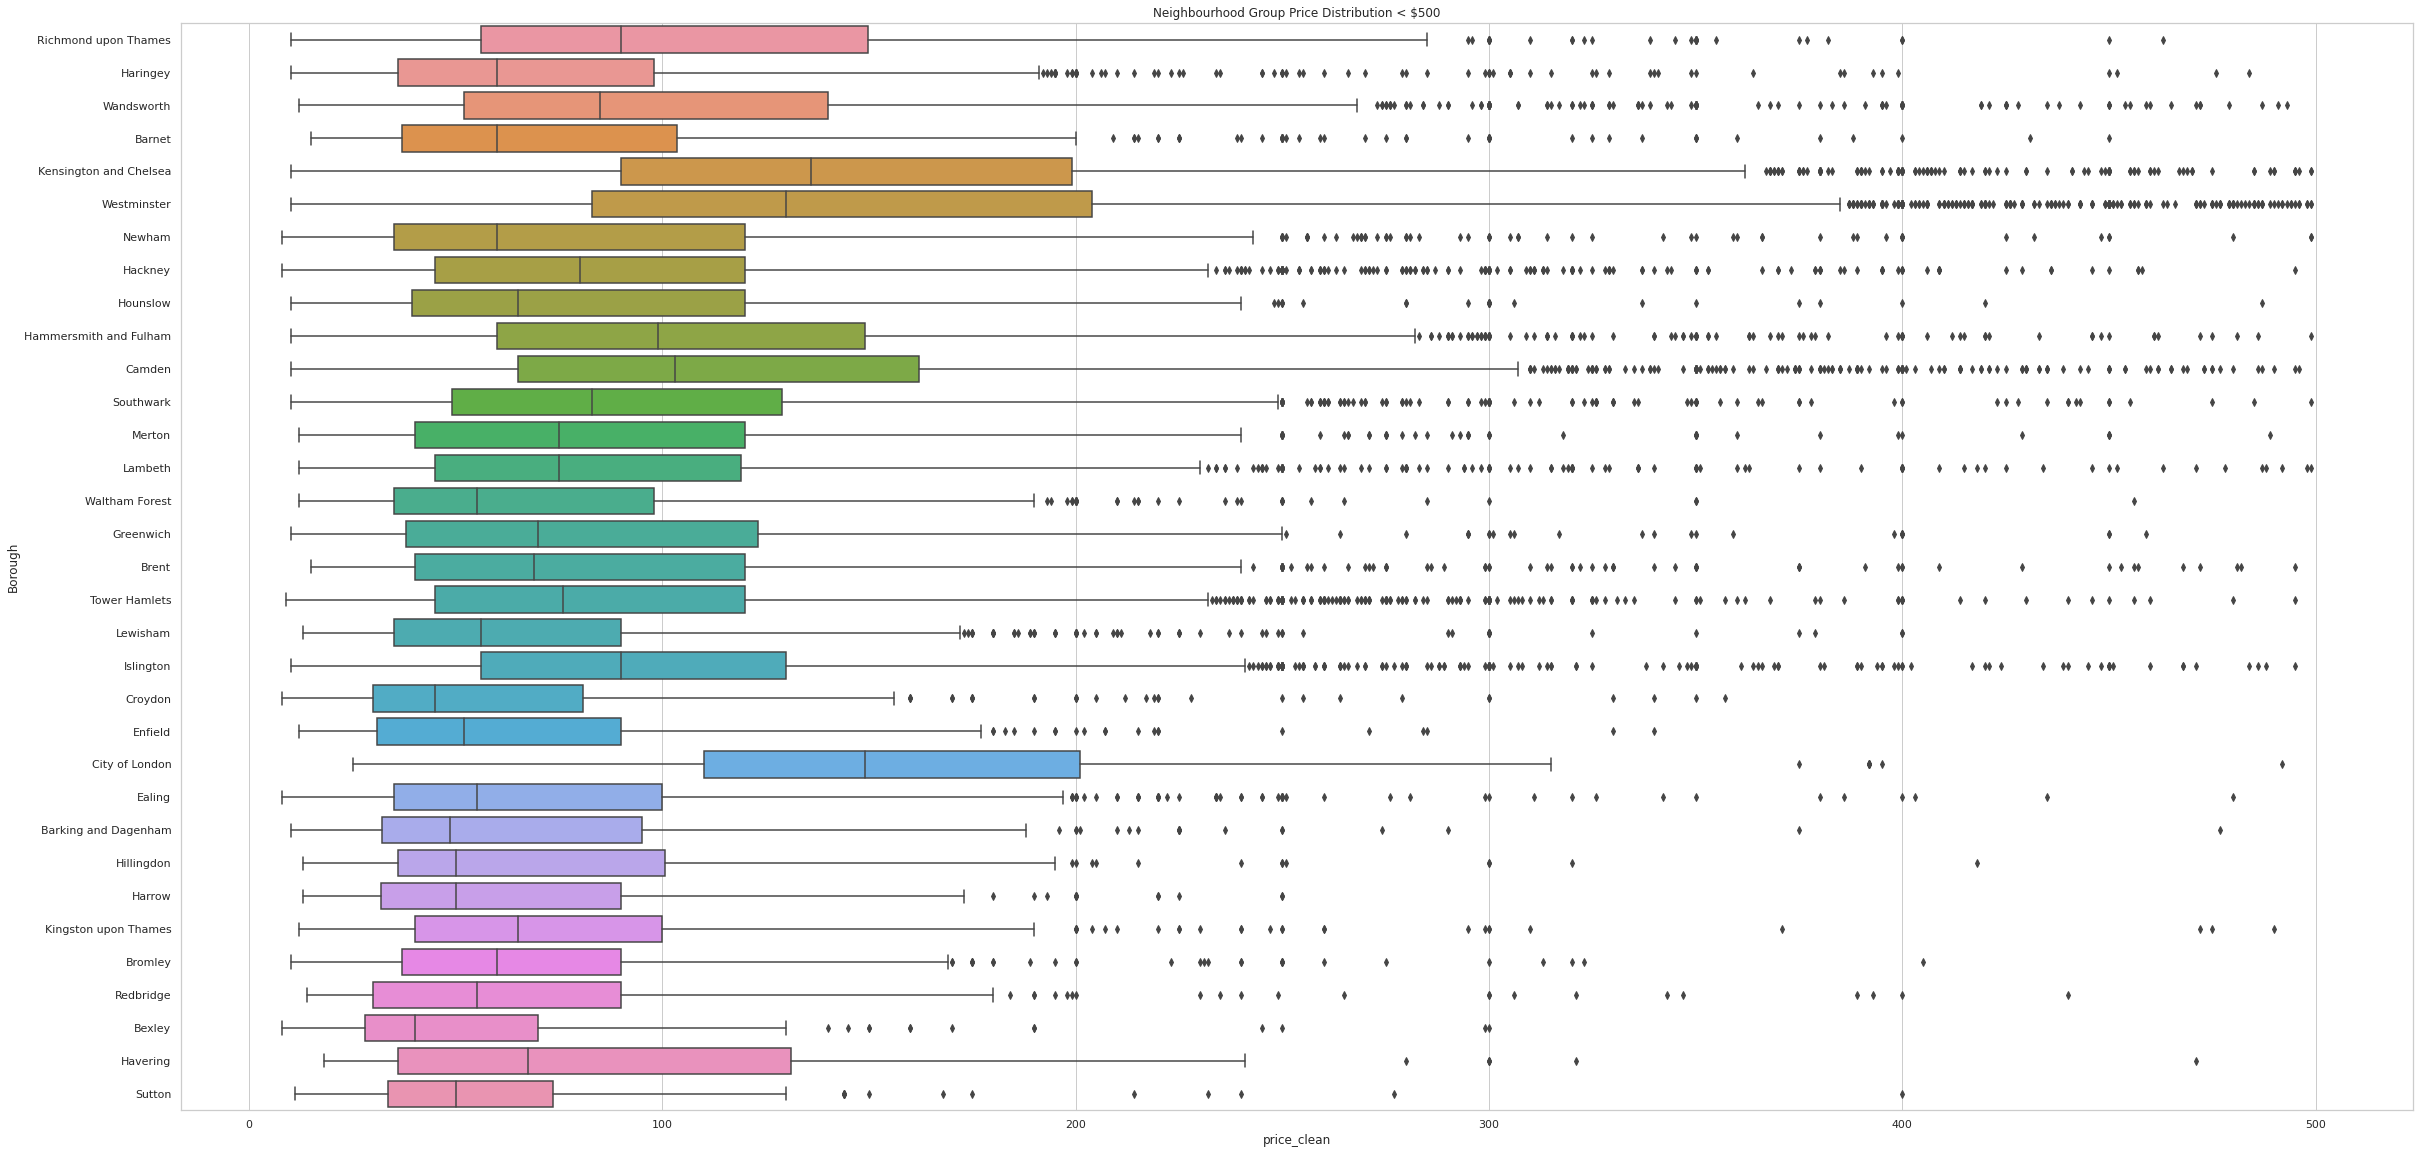

In [ ]:
import matplotlib.pyplot as plt
sns.set(font_scale = 1, palette="rocket",style="whitegrid")
plt.figure(figsize=(40,20))
plt.title("Neighbourhood Group Price Distribution < $500")
sns.boxplot(y="Borough",x ='price_clean',orient="h", data = listings_data_clean_6[listings_data_clean_6.price_clean<500])
plt.show()

## **The hosts demographic**

[Text(0.5, 1.0, 'Top 5 Airbnb Hosts in London')]

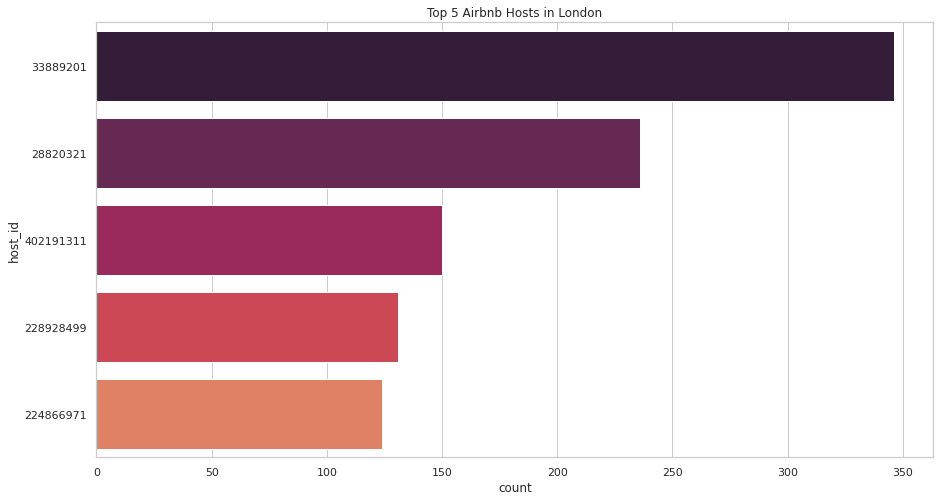

In [ ]:
#Top Airbnb Hosts
sns.countplot(y="host_id", data=listings_data_clean_6, order=listings_data_clean_6.host_id.value_counts().iloc[:5].index).set(title="Top 5 Airbnb Hosts in London")

#listings_data_clean_5.loc[listings_data_clean_5['host_id']==33889201]

In [ ]:
#Top 10 Host by host name, room type and neighbourhood
listings_data_clean_6[['host_id']].value_counts().head(10)

## **Does it matter much if you are a Superhost?**

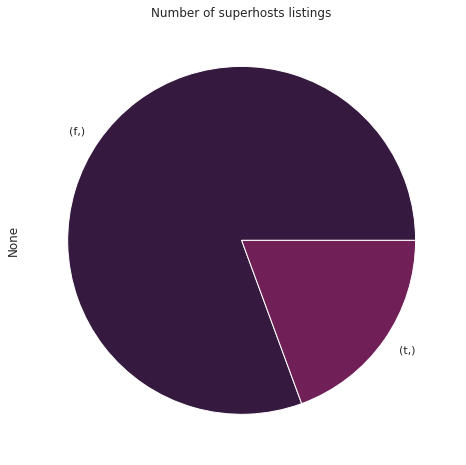

In [ ]:
#listings_data_clean_5.loc[listings_data_clean_5["host_is_superhost"] == "t"] = 'Superhost'

listings_data_clean_6[['host_is_superhost']].value_counts().plot(kind='pie',title='Number of superhosts listings')  

In [ ]:
# Plotting the pie chart for above dataframe
#listings_data_clean_5.groupby(['host_is_superhost']).sum().plot(kind='pie', y='host_is_superhost')

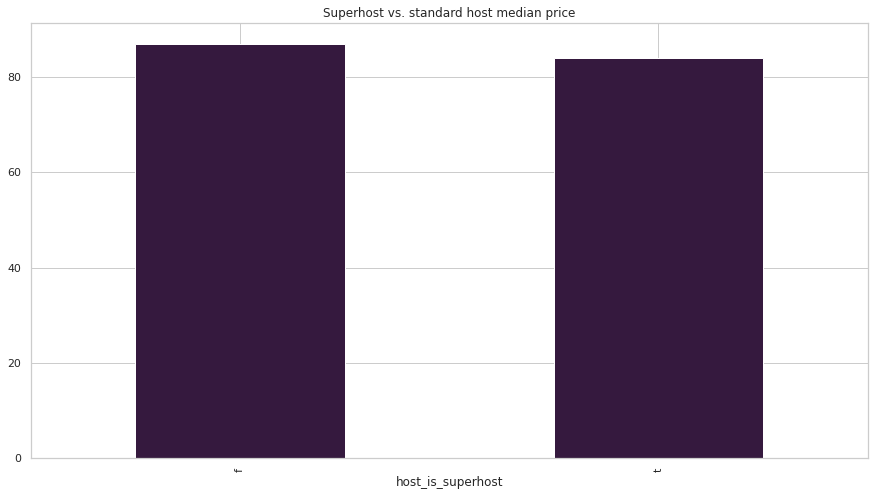

In [ ]:
listings_data_clean_6.groupby(['host_is_superhost'])['price_clean'].median().plot(kind='bar',title='Superhost vs. standard host median price')  

## **Accommodates**

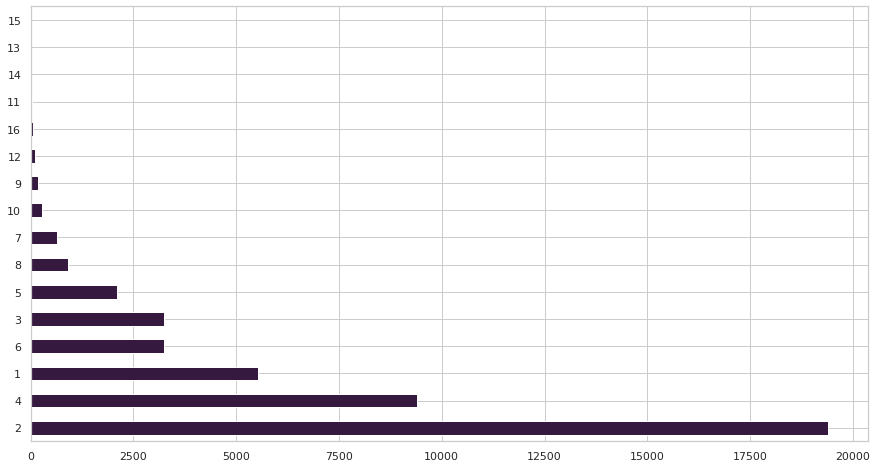

In [ ]:
listings_data_clean_6.accommodates.value_counts().plot(kind='barh')

## **Airbnb Guest Ratings**

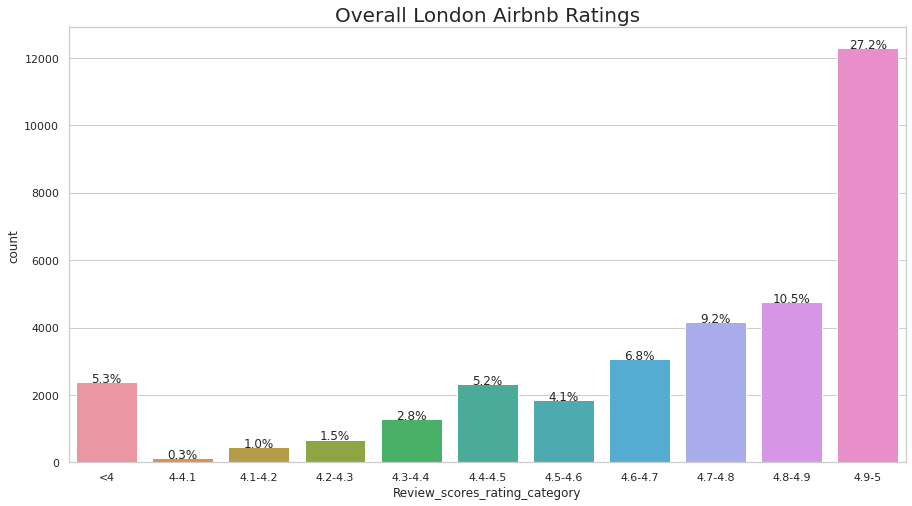

In [ ]:
#Categorise Ratings
listings_data_clean_6['Review_scores_rating_category'] = pd.cut(listings_data_clean_5['review_scores_rating'],
                                                                [1,4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5], 
                                                                labels=['<4','4-4.1','4.1-4.2','4.2-4.3','4.3-4.4','4.4-4.5','4.5-4.6','4.6-4.7','4.7-4.8','4.8-4.9','4.9-5'])

#Overall Rating Distribution Graph

sns.set(font_scale = 1, palette="rocket",style="whitegrid",rc={"figure.figsize":(15, 8)})

total = float(len(listings_data_clean_6))

ax = sns.countplot(x="Review_scores_rating_category", data=listings_data_clean_6)

plt.title('Overall London Airbnb Ratings', fontsize=20)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + (p.get_width()/2)
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

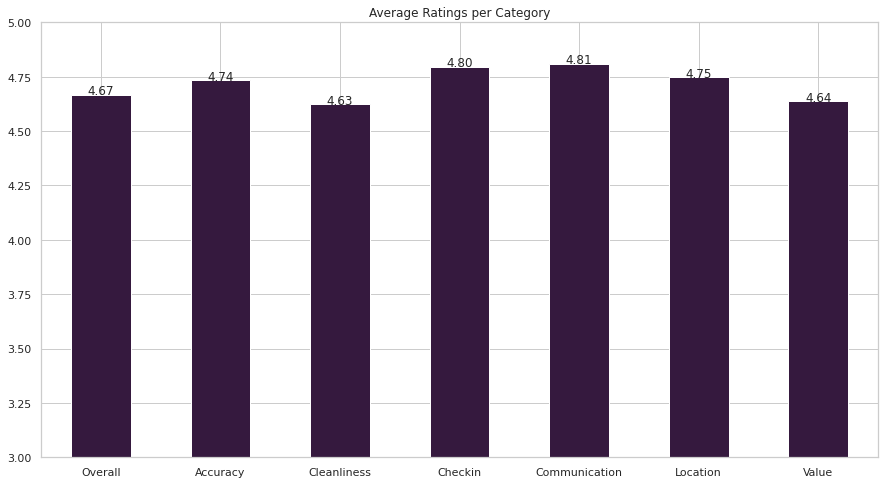

In [ ]:
#Average Ratings
avg_cols = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

ax=listings_data_clean_6[avg_cols].mean().plot(kind='bar')
ax.set_xticklabels(('Overall','Accuracy', 'Cleanliness','Checkin','Communication','Location','Value'),rotation="0")
ax.set_title('Average Ratings per Category')

plt.ylim([3, 5])


for p in ax.patches:
    #percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    mean="{:.2f}".format(p.get_height())
    x = p.get_x() + (p.get_width()/2)
    y = p.get_height()
    ax.annotate(mean, (x, y),ha='center')



In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error #metrics

def model_random_forest(TEST_SIZE,RAND_STATE,df,X,y):
  #prepare train and test datasets for modelling

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

  #train RF regressor model
  forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=RAND_STATE, 
                               n_jobs=-1)

  forest.fit(X_train, y_train.squeeze())

  #calculate scores for the model
  y_train_preds = forest.predict(X_train)
  y_test_preds = forest.predict(X_test)

  print('Random Forest MSE train: %.3f, test: %.3f' % (
          mean_squared_error(y_train, y_train_preds),
          mean_squared_error(y_test, y_test_preds)))
  print('Random Forest R^2 train: %.3f, test: %.3f' % (
          r2_score(y_train, y_train_preds),
          r2_score(y_test, y_test_preds)))

  #get feature importances from the model
  headers = ["name", "score"]
  values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
  forest_feature_importances = pd.DataFrame(values, columns = headers)
  forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

  features = forest_feature_importances['name'][:15]
  y_pos = np.arange(len(features))
  scores = forest_feature_importances['score'][:15]

  #plot feature importances
  plt.figure(figsize=(10,5))
  plt.bar(y_pos, scores, align='center', alpha=0.5)
  plt.xticks(y_pos, features, rotation='vertical')
  plt.ylabel('Score')
  plt.xlabel('Features')
  plt.title('Feature importances (Random Forest)')

  plt.savefig('feature importances RF.png')
  
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



Random Forest MSE train: 0.026, test: 0.054
Random Forest R^2 train: 0.903, test: 0.785


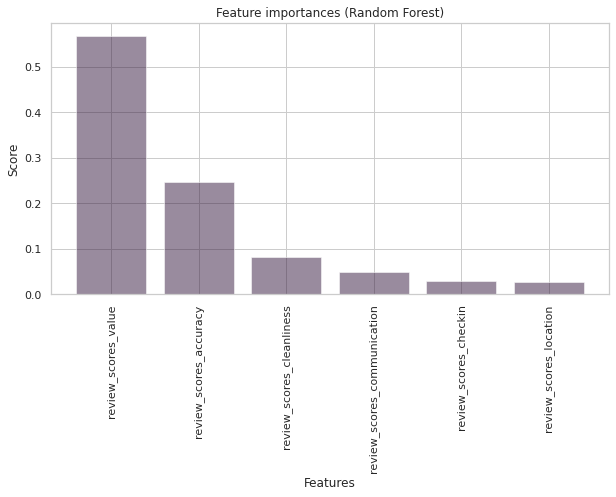

In [ ]:
X = listings_data_clean_6[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
y = listings_data_clean_6[['review_scores_rating']]

model_random_forest(0.3,42,listings_data_clean_6,X,y)

# **Prepping dataset for modelling**

### **Outliers Removal**

In [ ]:
fig = px.box(listings_data_clean_6, y="price_clean",width=600, height=600)
fig.update_layout(title_text="'Price boxplot")
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



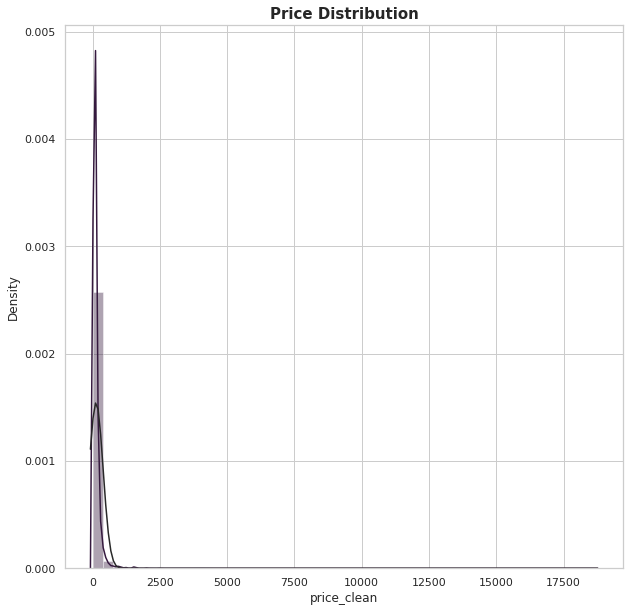

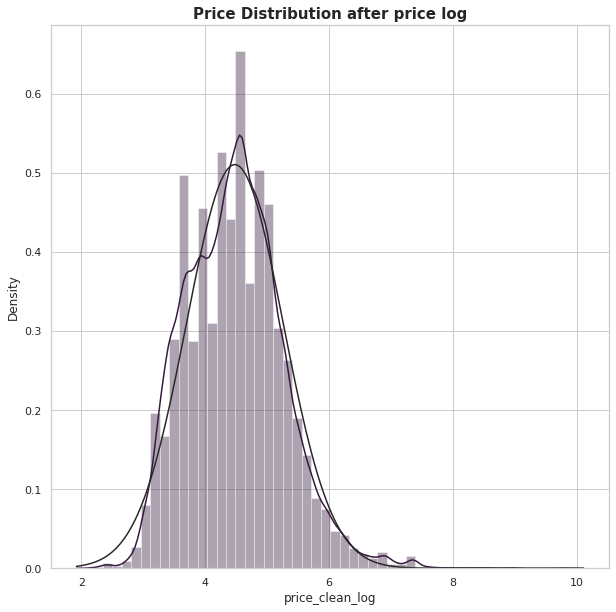

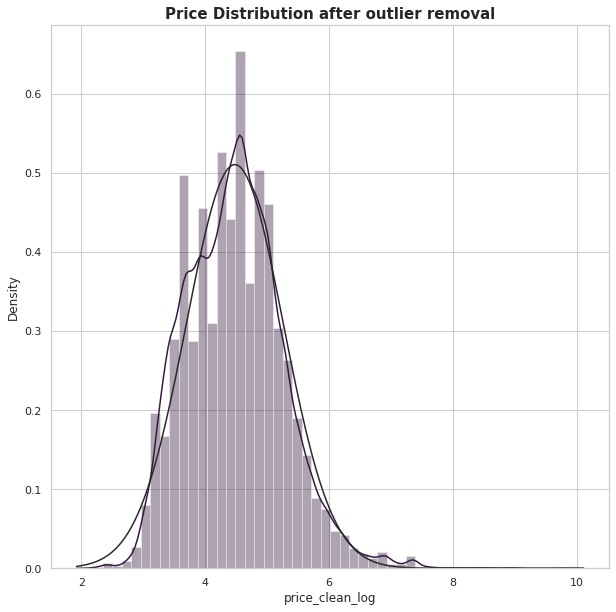

In [ ]:
from scipy.stats import norm
sns.set(font_scale = 1, palette="rocket",style="whitegrid",rc={"figure.figsize":(15, 8)})

def plot_distribution(data,column,title):
  plt.figure(figsize=(10,10))
  sns.distplot(data[column], fit=norm)
  plt.title(title,size=15, weight='bold')

def outlier_removal(dataset,column):
  first_quartile = dataset[column].describe()['25%']
  third_quartile = dataset[column].describe()['75%']
  interquartile_range = third_quartile-first_quartile
  outliers_removed_df = dataset[(dataset[column]<(first_quartile + 3*interquartile_range))]
  return outliers_removed_df

#Experiment 1
outlier_transform_1=listings_data_clean_6.copy()
#plot distribution before outliers removal
plot_distribution(outlier_transform_1,'price_clean','Price Distribution')

#log price (transform)
outlier_transform_1['price_clean_log'] = np.log(outlier_transform_1.price_clean+1)

#plot distribution after log price
plot_distribution(outlier_transform_1,'price_clean_log','Price Distribution after price log')

#remove outliers
outliers_removed_df_1=outlier_removal(outlier_transform_1,'price_clean_log') 

#plot distribution after outliers removal
plot_distribution(outlier_transform_1,'price_clean_log','Price Distribution after outlier removal') 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



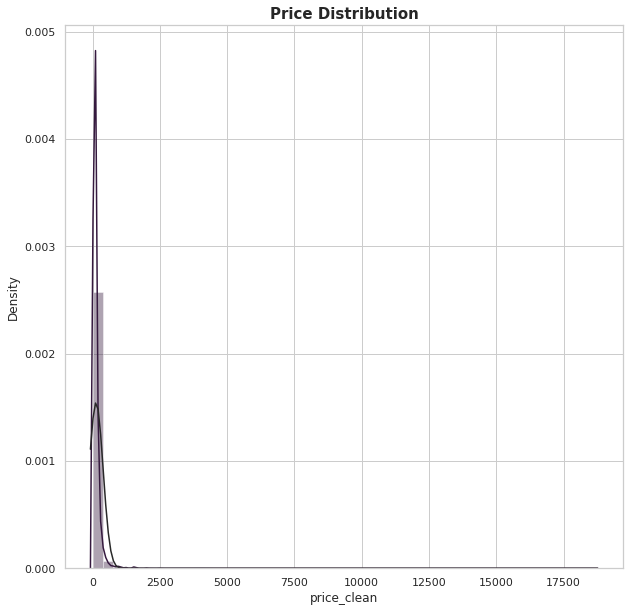

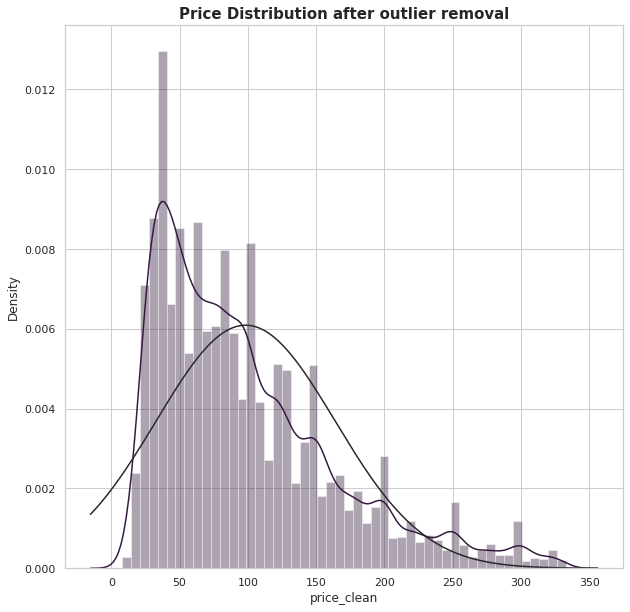

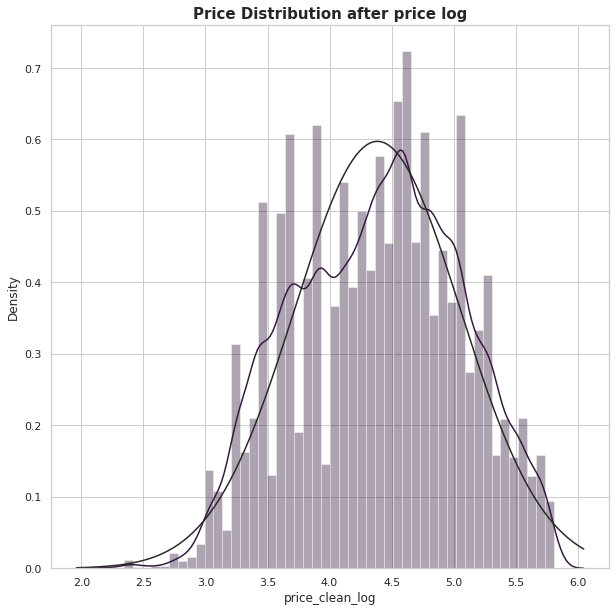

In [ ]:
#Experiment 2
outlier_transform_2=listings_data_clean_6.copy()

#plot distribution before outliers removal
plot_distribution(outlier_transform_2,'price_clean','Price Distribution')

#remove outliers
outlier_transform_2=outlier_removal(outlier_transform_2,'price_clean') 

#plot distribution after outliers removal
plot_distribution(outlier_transform_2,'price_clean','Price Distribution after outlier removal') 

#log price
outlier_transform_2['price_clean_log'] = np.log(outlier_transform_2.price_clean+1)

#plot distribution after log price
plot_distribution(outlier_transform_2,'price_clean_log','Price Distribution after price log')



In [ ]:
#Since the first approach is better
cleaned_df=outlier_transform_2.copy()

fig = px.box(cleaned_df, y="price_clean_log",width=600, height=600)
fig.update_layout(title_text="'Price boxplot")
fig.show()

## **Transform Categorical Data to Numerical**

In [ ]:
# get all categorical columns in the dataframe

to_remove=['neighborhood_overview','id','listing_url','name','description','picture_url','host_about','host_id','price_clean']
numeric_data=remove_columns(cleaned_df,to_remove)
numeric_data['Review_scores_rating_category'] = cleaned_df.Review_scores_rating_category.astype(str)

In [ ]:
# get all categorical columns in the dataframe
catCols = [col for col in numeric_data.columns if numeric_data[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder

#onehotencoding
lb_make = LabelEncoder()

for item in catCols:
    numeric_data[item] = lb_make.fit_transform(numeric_data[item])

In [ ]:
numeric_data.head()

Borough  host_location  host_response_time  host_response_rate  \
0       26           1458                   2          100.000000   
1       13           1055                   2          100.000000   
2       31            688                   3           92.816391   
3        1           1055                   3           92.816391   
4       19            882                   2          100.000000   

   host_acceptance_rate  host_is_superhost  host_neighbourhood  \
0              95.00000                  1                 197   
1              98.00000                  1                 187   
2               0.00000                  0                  15   
3              78.49825                  0                 177   
4              43.00000                  0                  56   

   host_has_profile_pic  host_identity_verified  latitude  longitude  \
0                     1                       1  51.48085   -0.28086   
1                     1                       1  51.58478   -0.16057   
2                     1                       1  51.47119   -0.16256   
3                     1                       1  51.57438   -0.21081   
4                     1                       1  51.48780   -0.16813   

   property_type  room_type  accommodates  bathrooms_text  bedrooms  beds  \
0             21          0             5               5       3.0   3.0   
1             51          2             2               1       1.0   1.0   
2             21          0             4               5       1.0   1.0   
3             51          2             2               6       1.0   1.0   
4             18          0             2               2       1.0   1.0   

   minimum_nights  maximum_nights  number_of_reviews  number_of_reviews_ltm  \
0               3              22                 89                     10   
1               2             365                550                     22   
2               3            1125                 93                      0   
3              10            1120                129                      0   
4               3              50                 89                      0   

   number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                       2                  4.82                    4.82   
1                       1                  4.85                    4.87   
2                       0                  4.89                    4.88   
3                       0                  4.78                    4.70   
4                       0                  4.79                    4.84   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.80                   4.94   
1                       4.84                   4.95   
2                       4.92                   4.89   
3                       4.94                   4.91   
4                       4.88                   4.87   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.96                    4.90                 4.63   
1                         4.96                    4.77                 4.85   
2                         4.93                    4.58                 4.64   
3                         4.89                    4.45                 4.74   
4                         4.82                    4.93                 4.73   

   instant_bookable  calculated_host_listings_count  \
0                 0                               1   
1                 1                               2   
2                 0                               1   
3                 1                               3   
4                 0                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            0   
2                                            1   
3                               

## **Feature Scaling - Standardisation**

In [ ]:
def standardise_variable(dataset, variables):
    standard_data = dataset.copy()

    # We apply the standard scaler to values of the variables that are inputted
    ss = StandardScaler()
    norm_data = ss.fit_transform(standard_data[variables].values)
    standard_data[to_normalise] = norm_data
    
    return standard_data

In [ ]:
"""
#standardised non binary data
from pandas.testing import assert_frame_equal
from sklearn.preprocessing import StandardScaler

standardised_data = numeric_data.copy()

to_standardised= ['host_response_rate', 'host_acceptance_rate', 'latitude', 'longitude', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'price_clean_log']
ss = StandardScaler()
norm_data = ss.fit_transform(standardised_data[to_standardised].values)
standardised_data[to_standardised] = norm_data

"""

"\n#standardised non binary data\nfrom pandas.testing import assert_frame_equal\nfrom sklearn.preprocessing import StandardScaler\n\nstandardised_data = numeric_data.copy()\n\nto_standardised= ['host_response_rate', 'host_acceptance_rate', 'latitude', 'longitude', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'price_clean_log']\nss = StandardScaler()\nnorm_data = ss.fit_transform(standardised_data[to_standardised].values)\nstandardised_data[to_standardised] = norm_data\n\n"

## **Feature Scaling - Normalisation**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

standardised_data = numeric_data.copy()

mmscaler = MinMaxScaler()
cols = list(standardised_data.columns)
standardised_data[cols] = mmscaler.fit_transform(standardised_data[cols])

In [ ]:
standardised_data.head()

Borough  host_location  host_response_time  host_response_rate  \
0  0.81250       0.732295            0.666667            1.000000   
1  0.40625       0.529884            0.666667            1.000000   
2  0.96875       0.345555            1.000000            0.928164   
3  0.03125       0.529884            1.000000            0.928164   
4  0.59375       0.442993            0.666667            1.000000   

   host_acceptance_rate  host_is_superhost  host_neighbourhood  \
0              0.950000                1.0            0.450801   
1              0.980000                1.0            0.427918   
2              0.000000                0.0            0.034325   
3              0.784983                0.0            0.405034   
4              0.430000                0.0            0.128146   

   host_has_profile_pic  host_identity_verified  latitude  longitude  \
0                   1.0                     1.0  0.482149   0.287518   
1                   1.0                     1.0  0.745496   0.438027   
2                   1.0                     1.0  0.457671   0.435537   
3                   1.0                     1.0  0.719144   0.375166   
4                   1.0                     1.0  0.499759   0.428568   

   property_type  room_type  accommodates  bathrooms_text  bedrooms      beds  \
0       0.233333   0.000000      0.266667        0.131579    0.1875  0.033898   
1       0.566667   0.666667      0.066667        0.026316    0.0625  0.000000   
2       0.233333   0.000000      0.200000        0.131579    0.0625  0.000000   
3       0.566667   0.666667      0.066667        0.157895    0.0625  0.000000   
4       0.200000   0.000000      0.066667        0.052632    0.0625  0.000000   

   minimum_nights  maximum_nights  number_of_reviews  number_of_reviews_ltm  \
0        0.001781    2.100000e-08           0.083412               0.013717   
1        0.000890    3.640000e-07           0.520379               0.030178   
2        0.001781    1.124000e-06           0.087204               0.000000   
3        0.008014    1.119000e-06           0.121327               0.000000   
4        0.001781    4.900000e-08           0.083412               0.000000   

   number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                0.019048                 0.964                   0.964   
1                0.009524                 0.970                   0.974   
2                0.000000                 0.978                   0.976   
3                0.000000                 0.956                   0.940   
4                0.000000                 0.958                   0.968   

   review_scores_cleanliness  review_scores_checkin  \
0                      0.960                  0.988   
1                      0.968                  0.990   
2                      0.984                  0.978   
3                      0.988                  0.982   
4                      0.976                  0.974   

   review_scores_communication  review_scores_location  review_scores_value  \
0                        0.992                   0.980                0.926   
1                        0.992                   0.954                0.970   
2                        0.986                   0.916                0.928   
3                        0.978                   0.890                0.948   
4                        0.964                   0.986                0.946   

   instant_bookable  calculated_host_listings_count  \
0               0.0                        0.000000   
1               1.0                        0.001185   
2               0.0                        0.000000   
3               1.0                        0.002370   
4               0.0                        0.000000   

   calculated_host_listings_count_entire_homes  \
0                                     0.001183   
1                                     0.000000   
2                                     0.001183   
3       

# **Correlation Analysis**

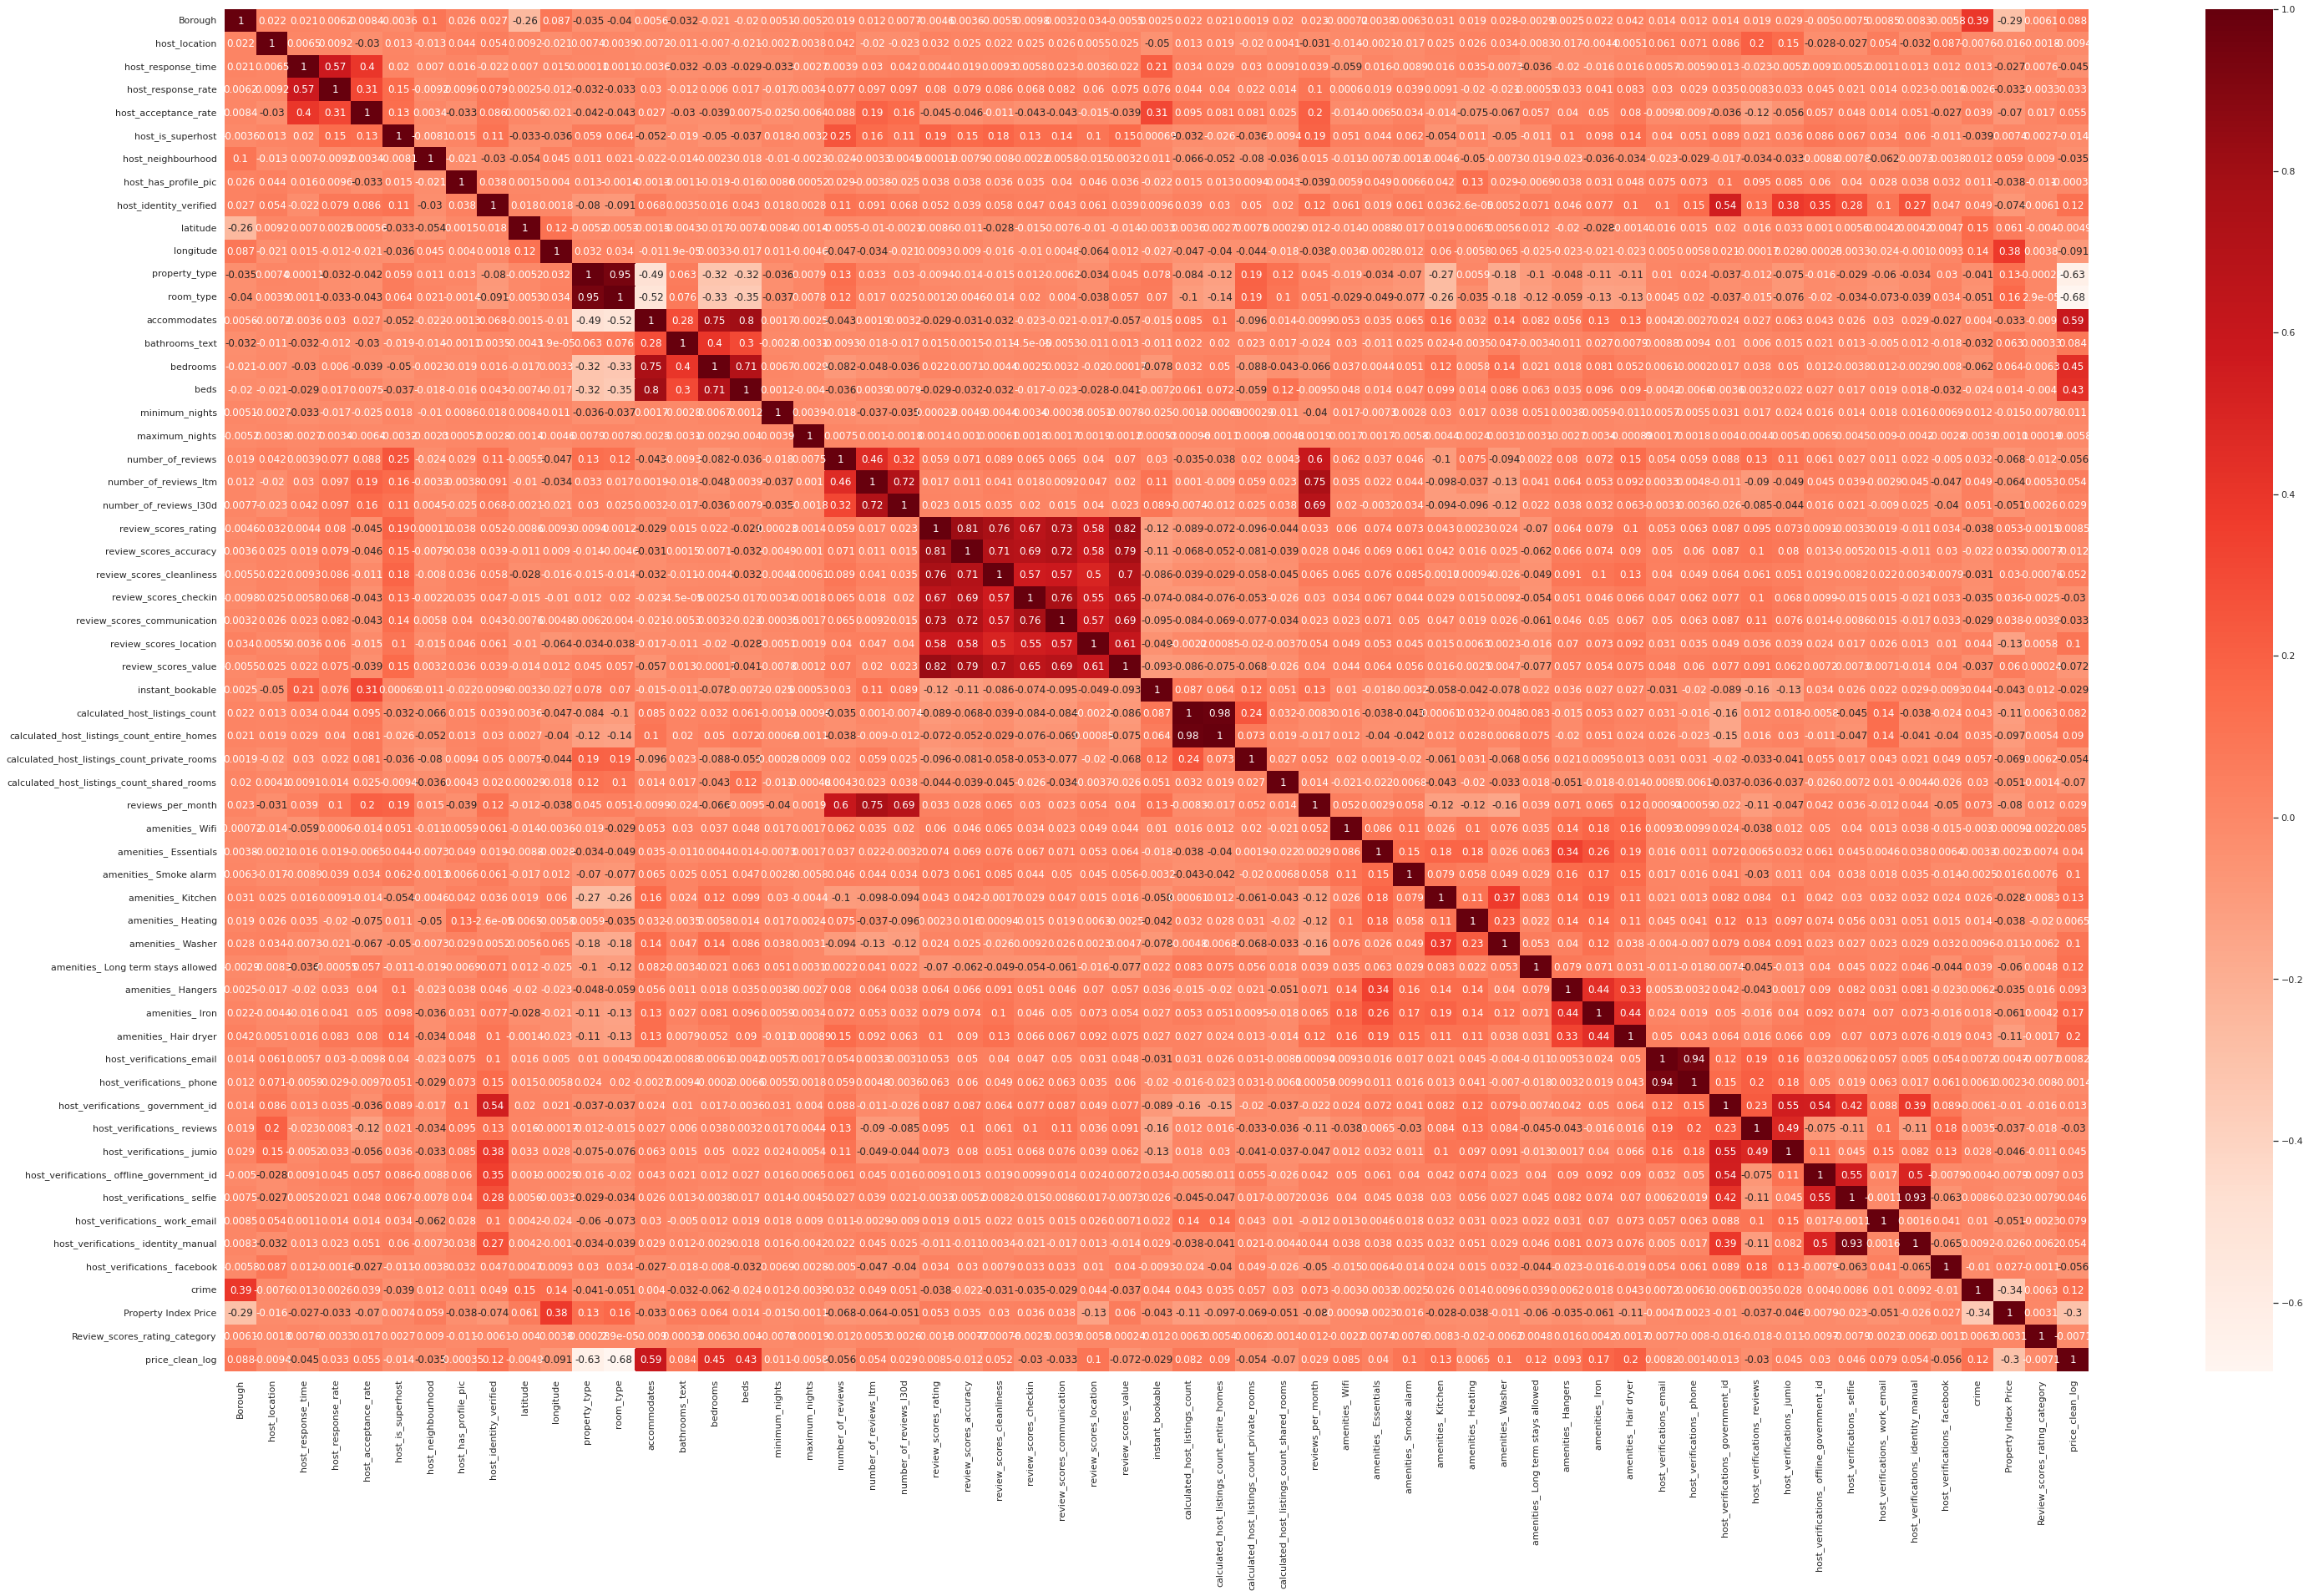

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(50,30))
cor = standardised_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## **Dealing with multi-collinearity**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



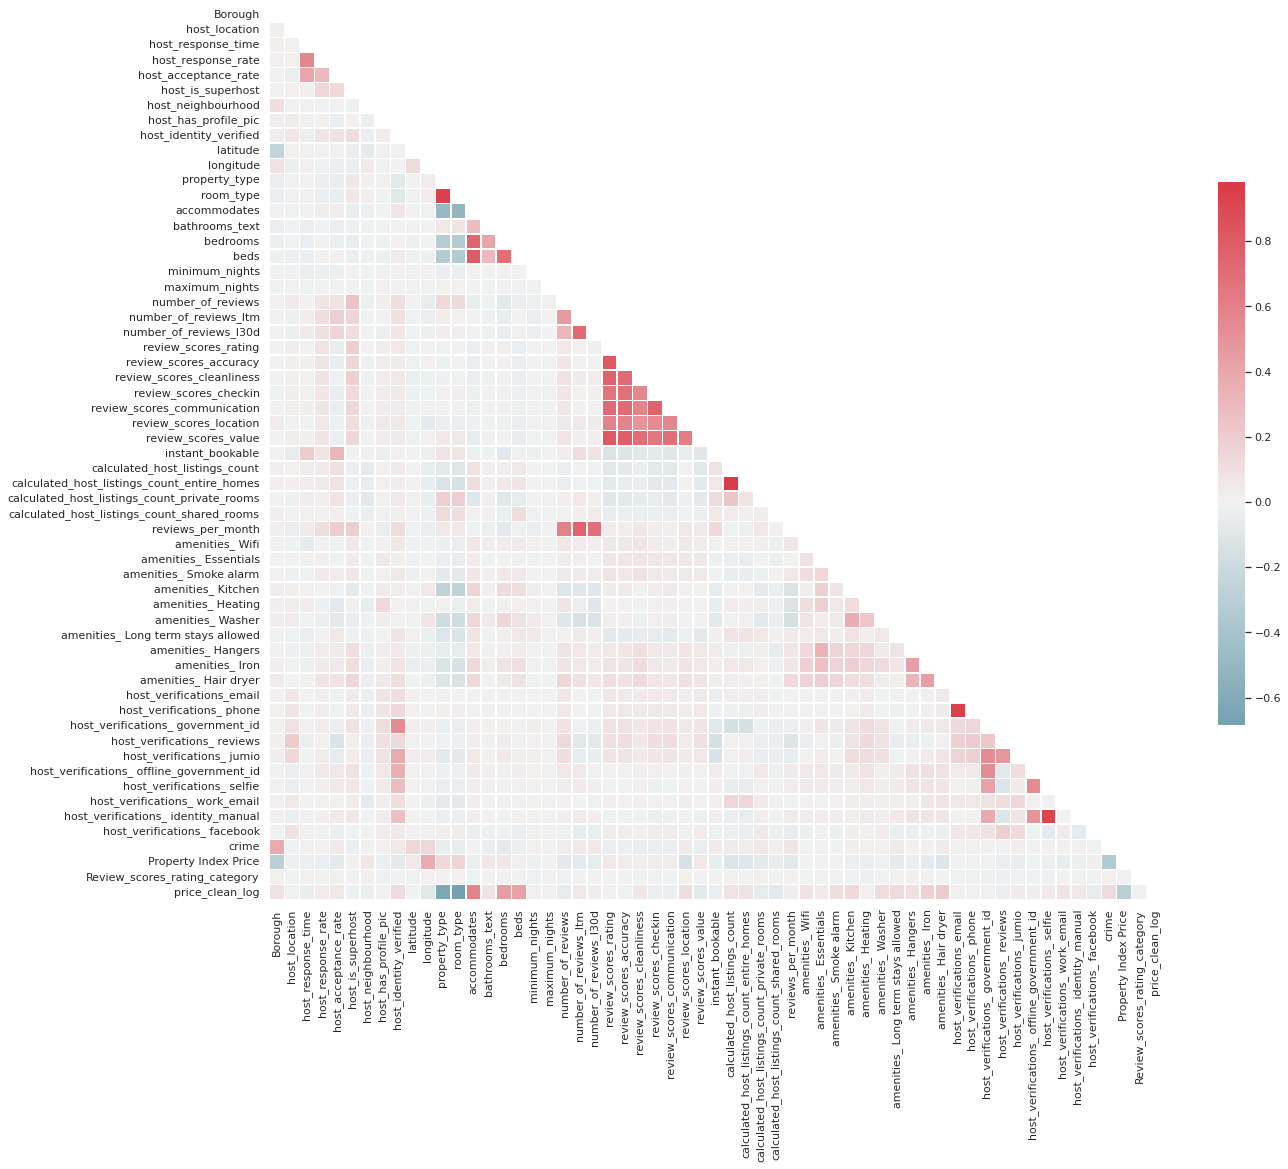

In [ ]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
  
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max())
    
  
multi_collinearity_heatmap(standardised_data, figsize=(20,20))

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split #sklearn import does not automatically install sub packages
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_OLS(dataset):
  #Partition the data
  #Create training and test datasets
  X = dataset.drop(columns = 'price_clean_log')
  Y = dataset[['price_clean_log']]

  X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 5)

  #Model statistics
  #Must add constant for y-intercept

  model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
  Y_pred = model.predict(sm.add_constant(X_test))
  print_model = model.summary()
  print(print_model)

  x_temp = sm.add_constant(X_train)

  vif_data = pd.DataFrame()
  vif_data["feature"] = x_temp.columns
  vif_data["VIF"] = [variance_inflation_factor(x_temp.values, i) for i in range(len(x_temp.columns))]
  vif_data.sort_values(by=['VIF'], inplace=True)
  print(vif_data)

In [ ]:
collinearity_test_1=numeric_data.copy()

compute_OLS(collinearity_test_1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



                            OLS Regression Results                            
Dep. Variable:        price_clean_log   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     1004.
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:21:36   Log-Likelihood:                -18189.
No. Observations:               34394   AIC:                         3.649e+04
Df Residuals:                   34337   BIC:                         3.697e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Experiement 2: Remove collinear features.



*   The calculated_host_listings_count and calculated_host_listings_count_entire_homes has a very high VIF value, which indicatest that they are collinear to each other, with VIF of 274.347982 and 259.314159 respectively. 
*    Will remove calculated_host_listings_count for the time bing



In [ ]:
#remove calculated_host_listings_count

collinearity_test_2=numeric_data.copy()
collinearity_test_2=collinearity_test_2.drop(['calculated_host_listings_count'], axis=1) #drop calculated_host_listings_count

compute_OLS(collinearity_test_2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



                            OLS Regression Results                            
Dep. Variable:        price_clean_log   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1017.
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:21:43   Log-Likelihood:                -18242.
No. Observations:               34394   AIC:                         3.660e+04
Df Residuals:                   34338   BIC:                         3.707e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
#remove calculated_host_listings_count

collinearity_test_3=collinearity_test_2.copy()
collinearity_test_3=collinearity_test_3.drop(['host_verifications_ phone','room_type','host_verifications_ selfie'], axis=1) #host_verifications_ phone

compute_OLS(collinearity_test_3)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



                            OLS Regression Results                            
Dep. Variable:        price_clean_log   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     919.2
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:21:51   Log-Likelihood:                -19871.
No. Observations:               34394   AIC:                         3.985e+04
Df Residuals:                   34341   BIC:                         4.030e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

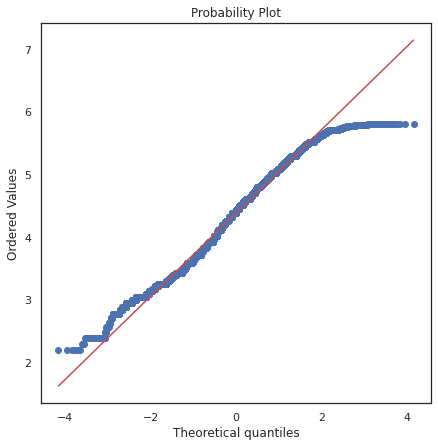

In [ ]:
#in the following graph, the good fit indicates that normality is a reasonable approximation
from scipy import stats
plt.figure(figsize=(7,7))
stats.probplot(collinearity_test_3['price_clean_log'],plot=plt)
plt.show()

In [ ]:
feature_select=collinearity_test_3.copy()

In [ ]:
feature_select.head()

host_location  host_response_time  host_response_rate  \
0           1458                   2          100.000000   
1           1055                   2          100.000000   
2            688                   3           92.816391   
3           1055                   3           92.816391   
4            882                   2          100.000000   

   host_acceptance_rate  host_is_superhost  host_neighbourhood  \
0              95.00000                  1                 197   
1              98.00000                  1                 187   
2               0.00000                  0                  15   
3              78.49825                  0                 177   
4              43.00000                  0                  56   

   host_has_profile_pic  host_identity_verified  Borough  latitude  longitude  \
0                     1                       1       26  51.48085   -0.28086   
1                     1                       1       13  51.58478   -0.16057   
2                     1                       1       31  51.47119   -0.16256   
3                     1                       1        1  51.57438   -0.21081   
4                     1                       1       19  51.48780   -0.16813   

   property_type  accommodates  bathrooms_text  bedrooms  beds  \
0             21             5               5       3.0   3.0   
1             51             2               1       1.0   1.0   
2             21             4               5       1.0   1.0   
3             51             2               6       1.0   1.0   
4             18             2               2       1.0   1.0   

   minimum_nights  maximum_nights  number_of_reviews  number_of_reviews_ltm  \
0               3              22                 89                     10   
1               2             365                550                     22   
2               3            1125                 93                      0   
3              10            1120                129                      0   
4               3              50                 89                      0   

   number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                       2                  4.82                    4.82   
1                       1                  4.85                    4.87   
2                       0                  4.89                    4.88   
3                       0                  4.78                    4.70   
4                       0                  4.79                    4.84   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.80                   4.94   
1                       4.84                   4.95   
2                       4.92                   4.89   
3                       4.94                   4.91   
4                       4.88                   4.87   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.96                    4.90                 4.63   
1                         4.96                    4.77                 4.85   
2                         4.93                    4.58                 4.64   
3                         4.89                    4.45                 4.74   
4                         4.82                    4.93                 4.73   

   instant_bookable  calculated_host_listings_count_entire_homes  \
0                 0                                            1   
1                 1                                            0   
2                 0                                            1   
3                 1                                            0   
4                 0                                            1   

   calculated_host_listings_count_private_rooms  \
0                                             0   
1                                             2   
2                                             0   
3               

# **Prediction Models**

In [ ]:
baseline_model=feature_select.copy()

X = baseline_model.drop(columns = 'price_clean_log')
Y = baseline_model[['price_clean_log']]

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 5)

## **Baseline Model: XGBoost**

In [ ]:
import time
import xgboost as xgb
from xgboost import plot_importance

xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, Y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(Y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(Y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(Y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(Y_test, val_preds_xgb_reg),4))

[14:21:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run: 0.1 minutes

Training MSE: 0.1183
Validation MSE: 0.1288

Training r2: 0.7339
Validation r2: 0.7143


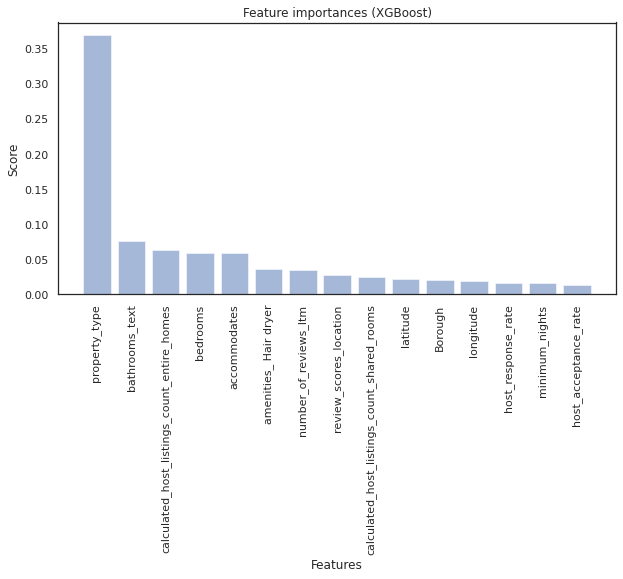

In [ ]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb_reg.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances for top 15 features
features = xgb_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = xgb_feature_importances['score'][:15]
 
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (XGBoost)')

plt.savefig('feature importances XGB.png')
 
plt.show()

In [ ]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

weight
review_scores_checkin                         0.000000
host_verifications_ identity_manual           0.000000
host_verifications_ work_email                0.000000
host_is_superhost                             0.000000
host_verifications_ jumio                     0.000000
host_has_profile_pic                          0.000000
host_identity_verified                        0.000000
number_of_reviews_l30d                        0.000000
host_verifications_ government_id             0.000000
host_verifications_email                      0.000000
review_scores_accuracy                        0.000000
host_verifications_ facebook                  0.000000
amenities_ Washer                             0.000000
amenities_ Heating                            0.000000
amenities_ Essentials                         0.000000
host_verifications_ offline_government_id     0.001428
host_location                                 0.001797
number_of_reviews                             0.003742
review_scores_rating                          0.003808
amenities_ Smoke alarm                        0.003872
amenities_ Hangers                            0.004168
amenities_ Kitchen                            0.004658
host_verifications_ reviews                   0.005463
amenities_ Long term stays allowed            0.005648
Review_scores_rating_category                 0.005660
reviews_per_month                             0.005796
review_scores_communication                   0.006500
amenities_ Iron                               0.006884
beds                                          0.007330
amenities_ Wifi                               0.007884
host_response_time                            0.008117
review_scores_cleanliness                     0.009135
host_neighbourhood                            0.009138
instant_bookable                              0.010239
calculated_host_listings_count_private_rooms  0.010339
maximum_nights                                0.010488
review_scores_value                           0.010965
host_acceptance_rate                          0.013331
minimum_nights                                0.015765
host_response_rate                            0.016342
longitude                                     0.018918
Borough                                       0.020759
latitude                                      0.022197
calculated_host_listings_count_shared_rooms   0.024448
review_scores_location                        0.028093
number_of_reviews_ltm                         0.034752
amenities_ Hair dryer                         0.036618
accommodates                                  0.059239
bedrooms                                      0.059337
calculated_host_listings_count_entire_homes   0.062931
bathrooms_text                                0.075535
property_type                                 0.368676

## **Random Forest Regression**

In [ ]:
#prepare train and test datasets for modelling
from sklearn.model_selection import train_test_split 

TEST_SIZE = 0.3
RAND_STATE = 42

X = baseline_model.drop(columns = 'price_clean_log')
y = baseline_model[['price_clean_log']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [ ]:
#train RF regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error #metrics

rf_start = time.time()

forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=RAND_STATE, 
                               n_jobs=-1)

forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

rf_end = time.time()

print(f"Time taken to run: {round((rf_end - rf_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, y_train_preds),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_preds),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_preds),4))
print("Validation r2:", round(r2_score(y_test, y_test_preds),4))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



Time taken to run: 0.3 minutes

Training MSE: 0.0161
Validation MSE: 0.1142

Training r2: 0.9638
Validation r2: 0.744


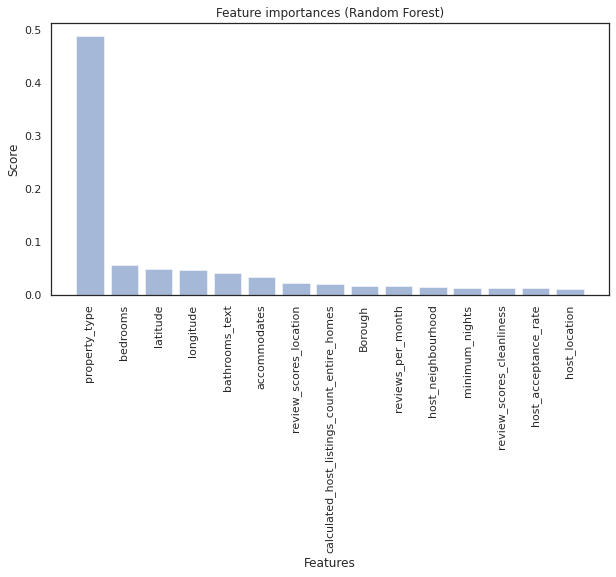

In [ ]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

#plot feature importances
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')

plt.savefig('feature importances RF.png')
 
plt.show()

In [ ]:
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

forest_feature_importances

name     score
0                                  property_type  0.488625
1                                       bedrooms  0.055738
2                                       latitude  0.048960
3                                      longitude  0.046184
4                                 bathrooms_text  0.040403
5                                   accommodates  0.032748
6                         review_scores_location  0.021137
7    calculated_host_listings_count_entire_homes  0.019446
8                                        Borough  0.016449
9                              reviews_per_month  0.016133
10                            host_neighbourhood  0.013763
11                                minimum_nights  0.013311
12                     review_scores_cleanliness  0.013089
13                          host_acceptance_rate  0.012289
14                                 host_location  0.011348
15                                maximum_nights  0.011305
16                            host_response_rate  0.011239
17                           review_scores_value  0.011235
18                             number_of_reviews  0.010039
19                         number_of_reviews_ltm  0.009645
20  calculated_host_listings_count_private_rooms  0.008500
21                        review_scores_accuracy  0.007542
22                          review_scores_rating  0.007494
23                         review_scores_checkin  0.007177
24                   review_scores_communication  0.006976
25   calculated_host_listings_count_shared_rooms  0.006010
26                                          beds  0.004397
27                 Review_scores_rating_category  0.004256
28                         amenities_ Essentials  0.003209
29                         amenities_ Hair dryer  0.003076
30                            host_response_time  0.002968
31                               amenities_ Iron  0.002430
32           host_verifications_ identity_manual  0.002332
33                   host_verifications_ reviews  0.002304
34                              instant_bookable  0.002243
35     host_verifications_ offline_government_id  0.002112
36                host_verifications_ work_email  0.001923
37                            amenities_ Hangers  0.001922
38                     host_verifications_ jumio  0.001909
39                        amenities_ Smoke alarm  0.001841
40                  host_verifications_ facebook  0.001719
41                             amenities_ Washer  0.001705
42                      host_verifications_email  0.001677
43                            amenities_ Kitchen  0.001662
44             host_verifications_ government_id  0.001581
45                        host_identity_verified  0.001540
46                               amenities_ Wifi  0.001513
47                        number_of_reviews_l30d  0.001426
48                             host_is_superhost  0.001242
49                            amenities_ Heating  0.001195
50            amenities_ Long term stays allowed  0.000818
51                          host_has_profile_pic  0.000212

## **Three Layer Neural Network**

In [ ]:
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2.summary())

# Visualising the neural network
SVG(model_to_dot(nn2, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

NameError: ignored